In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [3]:
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]

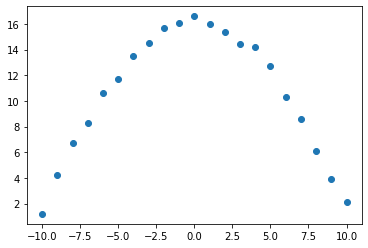

In [6]:
# Recasting data into numpy arrays
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

In [7]:
gauss = lambda x, A, B: A*np.exp(-B*x**2)

In [8]:
gauss

<function __main__.<lambda>(x, A, B)>

In [12]:
parameters, covariance = curve_fit(gauss, xdata, ydata);

<ipython-input-7-d380838008c1>:1: RuntimeWarning: overflow encountered in exp
  gauss = lambda x, A, B: A*np.exp(-B*x**2)


In [13]:
parameters

array([1.69342863e+01, 1.57396009e-02])

In [14]:
covariance

array([[1.27149879e-01, 1.88214488e-04],
       [1.88214488e-04, 7.48572383e-07]])

In [15]:
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

16.934286340519687
0.015739600927241554


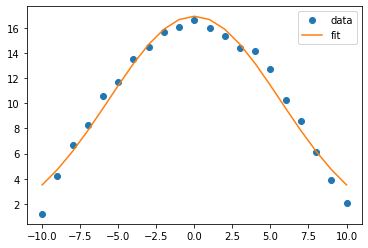

In [17]:
fit_y = gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label = 'data')
plt.plot(xdata, fit_y, '-', label = 'fit')
plt.legend()

In [18]:
covariance

array([[1.27149879e-01, 1.88214488e-04],
       [1.88214488e-04, 7.48572383e-07]])

In [19]:
np.diag(covariance)

array([1.27149879e-01, 7.48572383e-07])

In [20]:
# To calculate the standard error of the parameters from the
# covariance, take the square root of the diagonal elements of the
# matrix

In [21]:
SE = np.sqrt(np.diag(covariance))

In [22]:
SE

array([0.35658082, 0.0008652 ])

In [24]:
SE_A = SE[0]
SE_B = SE[1]

In [25]:
print(f'The value of A is {fit_A:.5f} with standard error of {SE_A:.5f}.')

The value of A is 16.93429 with standard error of 0.35658.


In [26]:
print(f'The value of B is {fit_B:.5f} with standard error of {SE_B:.5f}.')

The value of B is 0.01574 with standard error of 0.00087.


## Fitting a Lennard-Jones potential

Consider the following data computed for a helium dimer. The interaction energy at several different internuclear separations is given. Fit this data to a Lennard-Jones potential.  
$$V = 4\epsilon\left ( (\sigma/r)^{12} - (\sigma/r)^{6} \right )$$

In [27]:
# Internuclear separation in angstroms
distances = [2.875, 3.0, 3.125, 3.25, 3.375, 3.5, 3.75, 4.0, 4.5, 5.0, 6.0]
# Energy in Wavenumbers
energies = [0.35334378061169025, -2.7260131253801405, -4.102738968283382, -4.557042640311599, -4.537519193684069, -4.296388508321034, -3.6304745046204117, -3.0205368595885536, -2.1929538006724814, -1.7245616790238782, -1.2500789753171557]

In [28]:
distances = np.asarray(distances)
energies = np.asarray(energies)

In [30]:
def lj_potential(distances, sigma, epsilon):
    return 4*epsilon*((sigma/distances)**12 - (sigma/distances)**6)

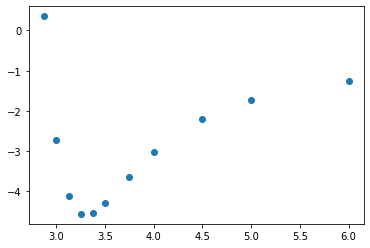

In [31]:
plt.plot(distances, energies, 'o')

In [32]:
parameters, covariance = curve_fit(lj_potential, distances, energies);

In [33]:
parameters

array([2.8927437 , 4.85719609])

In [34]:
covariance

array([[ 1.77645557e-04, -7.36502546e-05],
       [-7.36502546e-05,  9.49633494e-02]])

In [36]:
fit_sigma = parameters[0]
fit_epsilon = parameters[1]
print(fit_sigma)
print(fit_epsilon)

2.892743697738205
4.8571960903680065


Text(0, 0.5, '$V_{LJ}$')

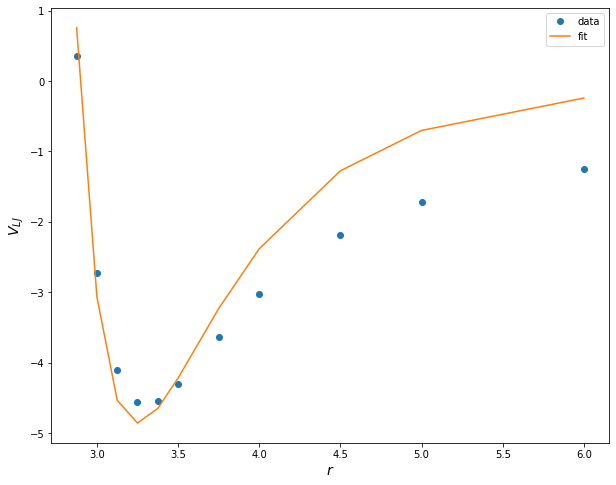

In [47]:
plt.figure(figsize = (10,8))
fit_energies = lj_potential(distances, fit_sigma, fit_epsilon)
plt.plot(distances, energies, 'o', label = 'data')
plt.plot(distances, fit_energies, '-', label = 'fit')
plt.legend()
plt.xlabel(r'$r$', fontsize = 14)
plt.ylabel(r'$V_{LJ}$', fontsize = 14)


In [40]:
print(f'The value of sigma is {fit_sigma:.3f} angstroms.')
print(f'The value of epsilon is {fit_epsilon:.3f} wavenumbers.')

The value of sigma is 2.893 angstroms.
The value of epsilon is 4.857 wavenumbers.


In [48]:
lj_potential??